1. Tree-based models (very popular, often best starting point)  
    •	Decision Tree
	•	Random Forest (good baseline, very robust)  
	Gradient Boosting models:  
	•	XGBoost    

In [30]:
import pandas as pd

# Load the balanced datasets with thresholds of 1000 and 2500
df_smote_1000 = pd.read_csv('../Data/df_smote_1000.csv')
df_smote_2500 = pd.read_csv('../Data/df_smote_2500.csv')
df_smote_5000 = pd.read_csv('../Data/df_smote_5000.csv')
df_under_2500 = pd.read_csv('../Data/df_under_2500.csv')

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Creating LabelEncoder for the two datasets and encoding the Label column into a numeric form
le_1000 = LabelEncoder()
df_smote_1000['Label_Encoded'] = le_1000.fit_transform(df_smote_1000['Label'])

le_2500 = LabelEncoder()
df_smote_2500['Label_Encoded'] = le_2500.fit_transform(df_smote_2500['Label'])

le_5000 = LabelEncoder()
df_smote_5000['Label_Encoded'] = le_5000.fit_transform(df_smote_5000['Label'])

le_under_2500 = LabelEncoder()
df_under_2500['Label_Encoded'] = le_under_2500.fit_transform(df_under_2500['Label'])

# Dropping the original and the encoded label columns to separate for the target variable 
x_1000 = df_smote_1000.drop(['Label', 'Label_Encoded'], axis = 1)
y_1000 = df_smote_1000['Label_Encoded']

x_2500 = df_smote_2500.drop(['Label', 'Label_Encoded'], axis = 1)
y_2500 = df_smote_2500['Label_Encoded']

x_5000 = df_smote_5000.drop(['Label', 'Label_Encoded'], axis = 1)
y_5000 = df_smote_5000['Label_Encoded']

x_under_2500 = df_under_2500.drop(['Label', 'Label_Encoded'], axis = 1)
y_under_2500 = df_under_2500['Label_Encoded']

# Creating a StandardScaler and for normalizing the feature values
standard_scaler_1000 = StandardScaler()
x_1000_scaled = standard_scaler_1000.fit_transform(x_1000)

standard_scaler_2500 = StandardScaler()
x_2500_scaled = standard_scaler_2500.fit_transform(x_2500)

standard_scaler_5000 = StandardScaler()
x_5000_scaled = standard_scaler_2500.fit_transform(x_5000)

standard_scaler_under_2500 = StandardScaler()
x_under_2500_scaled = standard_scaler_under_2500.fit_transform(x_under_2500)





In [32]:
from sklearn.model_selection import train_test_split

# Splitting the scaled featured and labels into training and testing sets
x_train_1000, x_test_1000, y_train_1000, y_test_1000 = train_test_split(
    x_1000_scaled, y_1000, test_size = 0.2, random_state = 42, stratify = y_1000)

x_train_2500, x_test_2500, y_train_2500, y_test_2500 = train_test_split(
    x_2500_scaled, y_2500, test_size = 0.2, random_state = 42, stratify = y_2500)

x_train_5000, x_test_5000, y_train_5000, y_test_5000 = train_test_split(
    x_5000_scaled, y_5000, test_size = 0.2, random_state = 42, stratify = y_5000)

x_train_under_2500, x_test_under_2500, y_train_under_2500, y_test_under_2500 = train_test_split(
    x_under_2500_scaled, y_under_2500, test_size = 0.2, random_state = 42, stratify = y_under_2500)


In [33]:
# Getting the attack names from the label encoder for easy visualization
attack_names_1000 = le_1000.classes_
attack_names_2500 = le_2500.classes_
attack_names_5000 = le_5000.classes_
attack_names_under_2500 = le_under_2500.classes_

Decision Tree SMOTE 1000
Accuracy:  0.6151470588235294
Macro f1-score: 0.6154853388216884
Weighted f1-score: 0.6154853388216884
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.37      0.36      0.37       200
                 BENIGN       0.31      0.33      0.32       200
       BROWSERHIJACKING       0.47      0.44      0.45       200
       COMMANDINJECTION       0.38      0.41      0.39       200
 DDOS-ACK_FRAGMENTATION       0.96      0.97      0.97       200
        DDOS-HTTP_FLOOD       0.81      0.74      0.77       200
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       200
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.99      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.87      0.85      0.86       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.45      0.44       200
         DDOS-SYN_FLOOD   

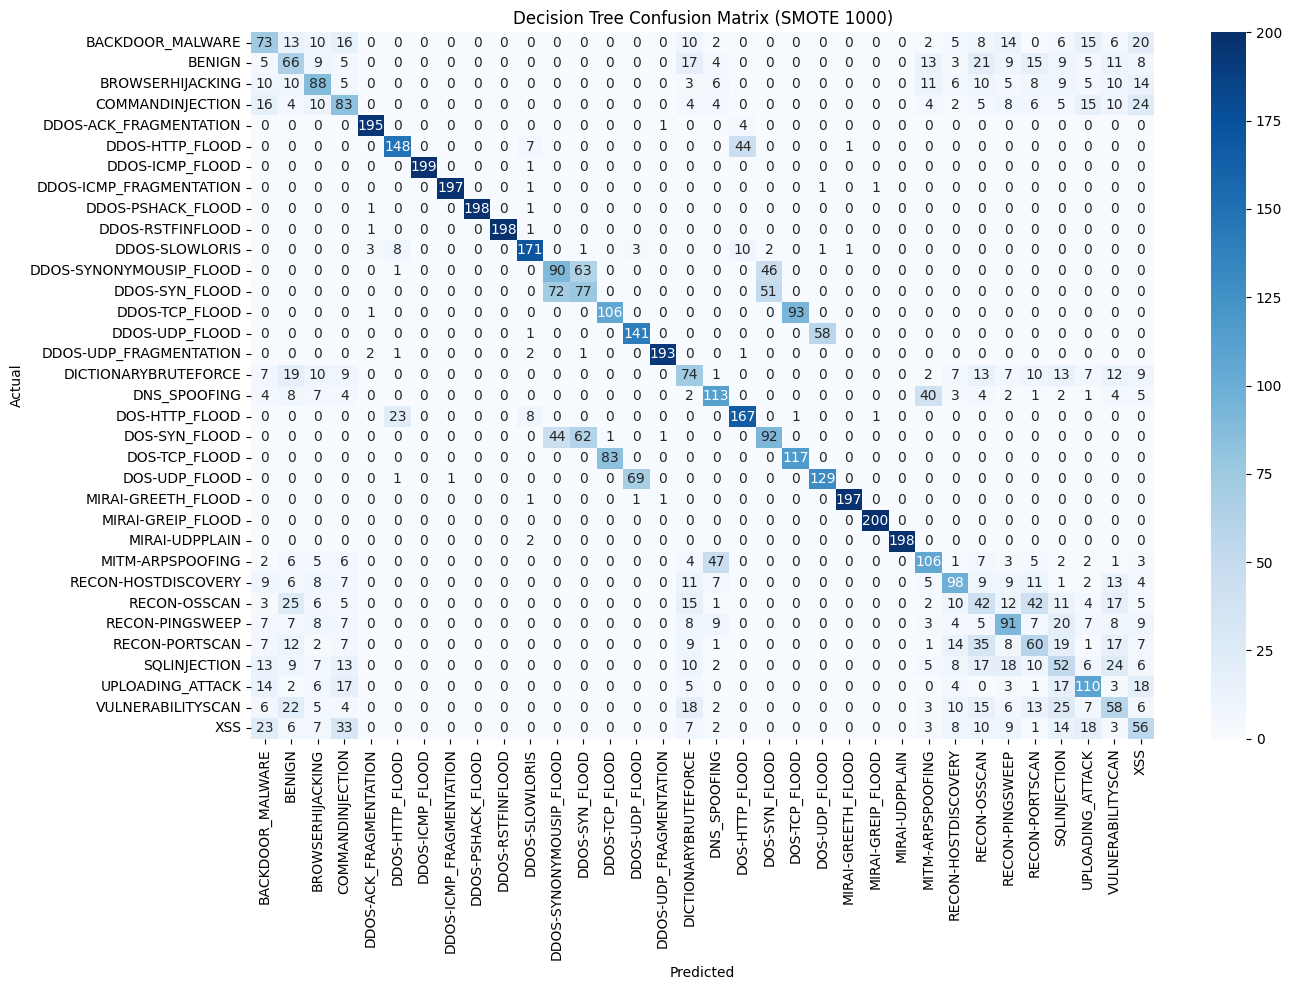

Decision Tree SMOTE 2500
Accuracy:  0.6632941176470588
Macro f1-score: 0.6625222639299281
Weighted f1-score: 0.6625222639299283
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.57      0.54      0.55       500
                 BENIGN       0.37      0.37      0.37       500
       BROWSERHIJACKING       0.56      0.56      0.56       500
       COMMANDINJECTION       0.48      0.56      0.52       500
 DDOS-ACK_FRAGMENTATION       0.98      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.80      0.83      0.81       500
        DDOS-ICMP_FLOOD       1.00      0.99      0.99       500
DDOS-ICMP_FRAGMENTATION       0.99      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.90      0.89      0.89       500
DDOS-SYNONYMOUSIP_FLOOD       0.47      0.47      0.47       500
         DDOS-SYN_FLOOD   

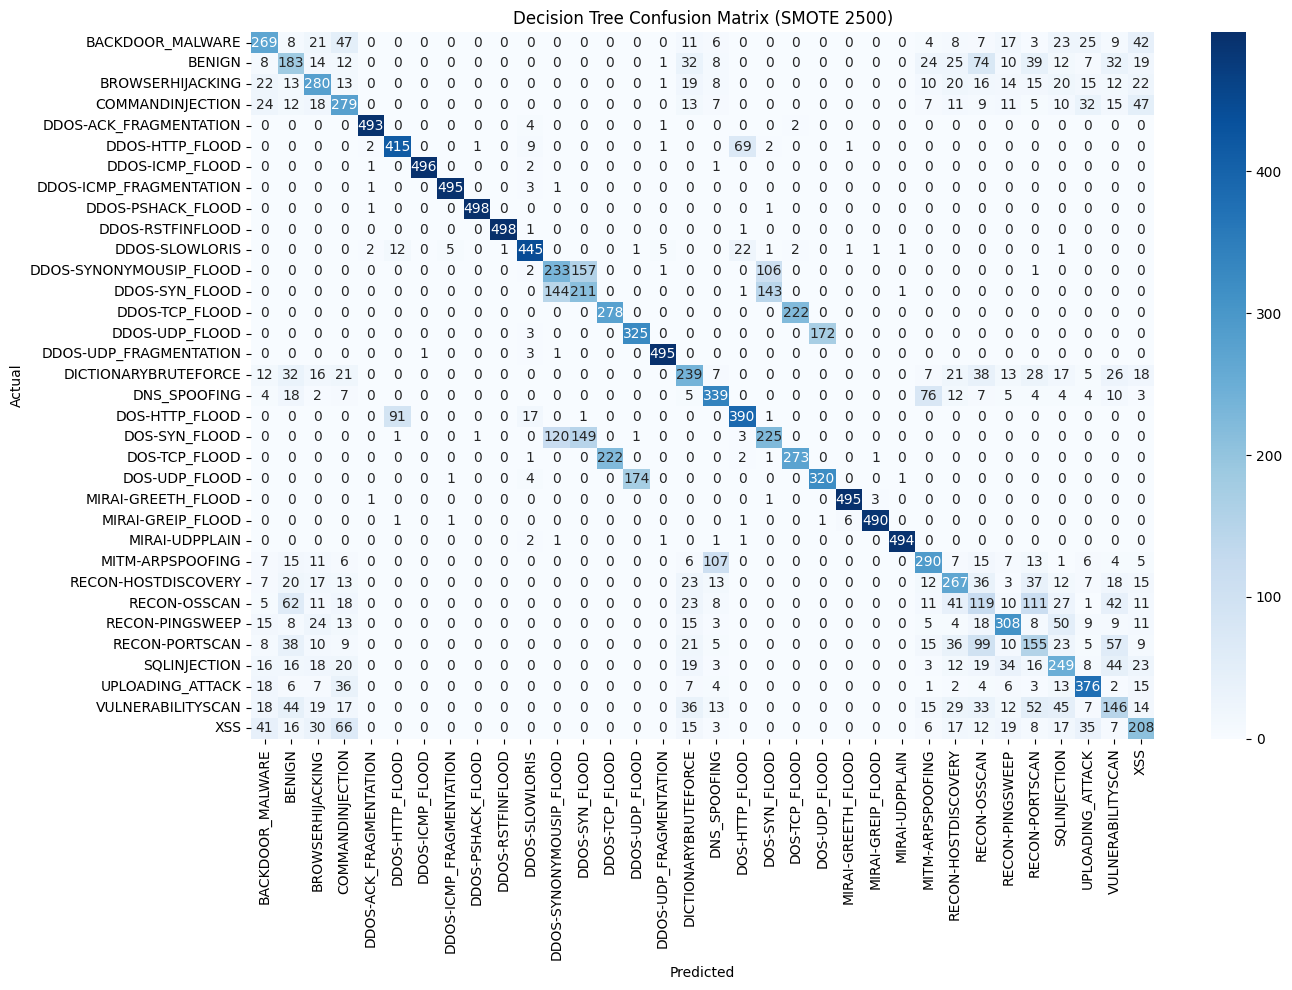

Decision Tree SMOTE 5000
Accuracy:  0.7004117647058824
Macro f1-score: 0.7003601117103336
Weighted f1-score: 0.7003601117103336
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.69      0.73      0.71      1000
                 BENIGN       0.40      0.41      0.40      1000
       BROWSERHIJACKING       0.69      0.68      0.69      1000
       COMMANDINJECTION       0.67      0.66      0.67      1000
 DDOS-ACK_FRAGMENTATION       0.99      0.98      0.98      1000
        DDOS-HTTP_FLOOD       0.79      0.81      0.80      1000
        DDOS-ICMP_FLOOD       1.00      1.00      1.00      1000
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.98      1000
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00      1000
       DDOS-RSTFINFLOOD       0.99      1.00      0.99      1000
         DDOS-SLOWLORIS       0.92      0.92      0.92      1000
DDOS-SYNONYMOUSIP_FLOOD       0.47      0.47      0.47      1000
         DDOS-SYN_FLOOD   

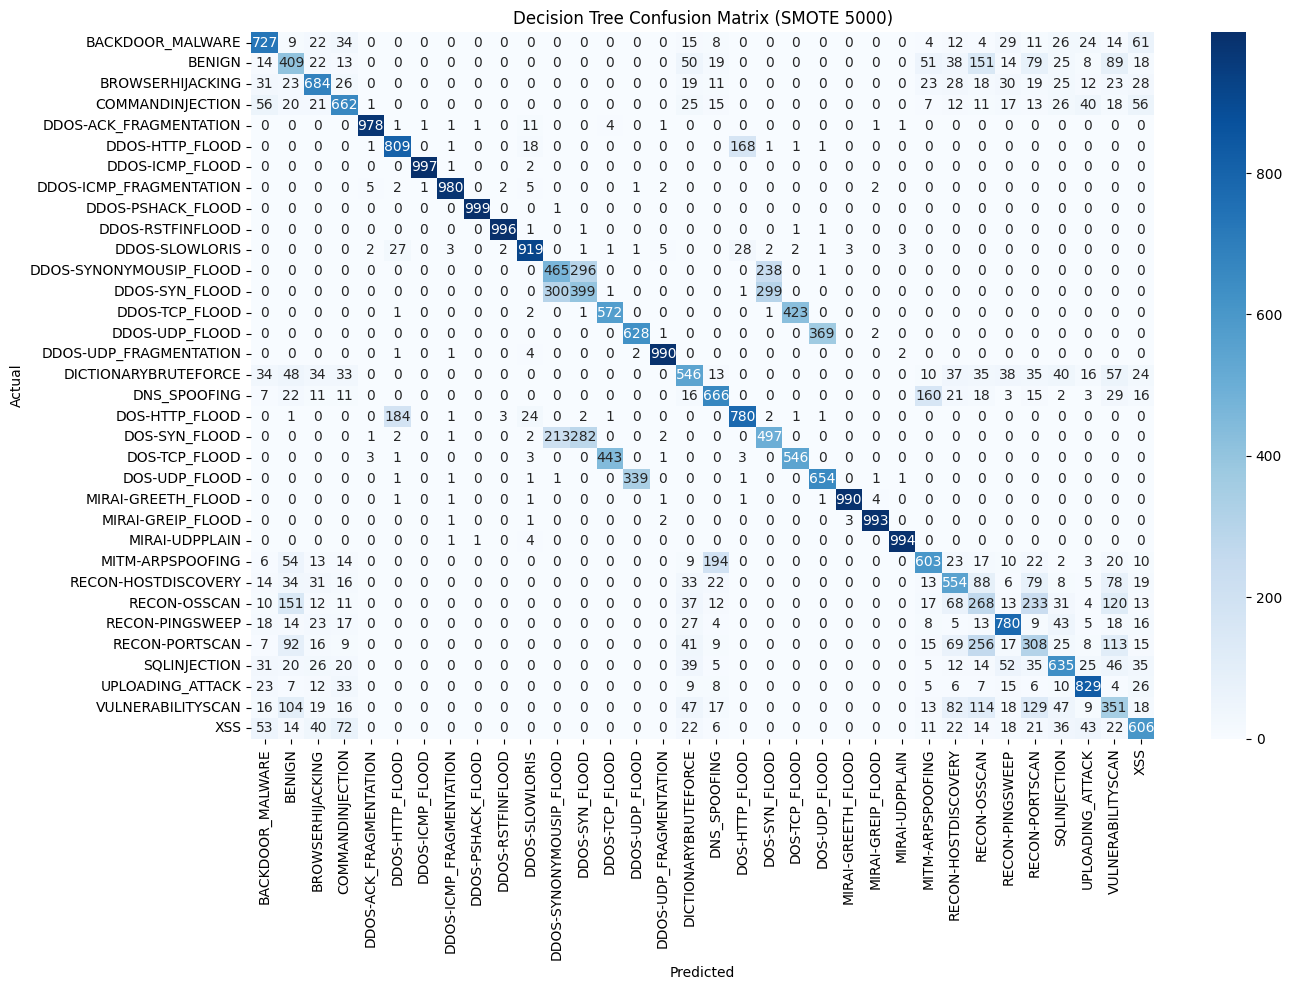

Decision Tree Under 2500
Accuracy:  0.6549838777512967
Macro f1-score: 0.5769839591851363
Weighted f1-score: 0.6547454757230085
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.24      0.25      0.24        97
                 BENIGN       0.44      0.40      0.42       500
       BROWSERHIJACKING       0.36      0.36      0.36       184
       COMMANDINJECTION       0.33      0.33      0.33       162
 DDOS-ACK_FRAGMENTATION       0.98      0.98      0.98       500
        DDOS-HTTP_FLOOD       0.80      0.75      0.77       500
        DDOS-ICMP_FLOOD       0.99      0.99      0.99       500
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.98       500
      DDOS-PSHACK_FLOOD       0.99      0.99      0.99       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.87      0.88      0.87       500
DDOS-SYNONYMOUSIP_FLOOD       0.42      0.44      0.43       500
         DDOS-SYN_FLOOD   

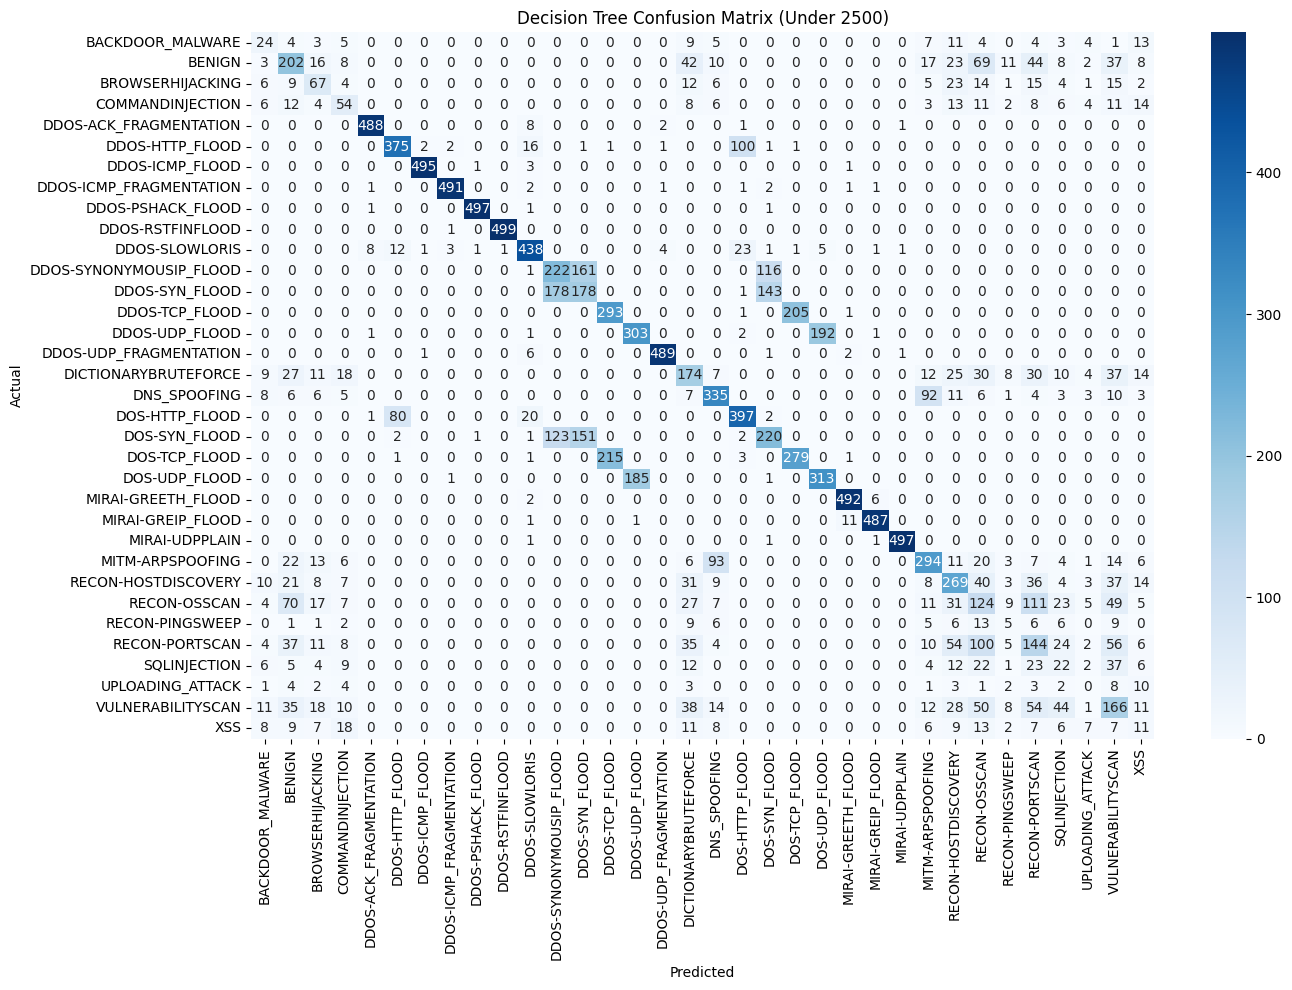

In [34]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree SMOTE 1000

print('Decision Tree SMOTE 1000')

# Initializing the Decision Tree classifier
decision_tree_1000 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_1000.fit(x_train_1000, y_train_1000)
y_pred_decision_tree_1000 = decision_tree_1000.predict(x_test_1000)

# Creating the classification report for the Decision Tree
print('Accuracy: ', accuracy_score(y_test_1000, y_pred_decision_tree_1000))
print('Macro f1-score:', f1_score(y_test_1000, y_pred_decision_tree_1000, average = 'macro'))
print('Weighted f1-score:', f1_score(y_test_1000, y_pred_decision_tree_1000, average = 'weighted'))
print(classification_report(y_test_1000, y_pred_decision_tree_1000, target_names = attack_names_1000))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_1000 = confusion_matrix(y_test_1000, y_pred_decision_tree_1000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_decision_tree_1000, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title("Decision Tree Confusion Matrix (SMOTE 1000)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# Decision Tree SMOTE 2500
print('Decision Tree SMOTE 2500')

# Initializing the Decision Tree classifier
decision_tree_2500 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_2500.fit(x_train_2500, y_train_2500)
y_pred_decision_tree_2500 = decision_tree_2500.predict(x_test_2500)

# Creating the classification report for the Decision Tree
print('Accuracy: ', accuracy_score(y_test_2500, y_pred_decision_tree_2500))
print('Macro f1-score:', f1_score(y_test_2500, y_pred_decision_tree_2500, average = 'macro'))
print('Weighted f1-score:', f1_score(y_test_2500, y_pred_decision_tree_2500, average = 'weighted'))
print(classification_report(y_test_2500, y_pred_decision_tree_2500, target_names = attack_names_2500))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_2500 = confusion_matrix(y_test_2500, y_pred_decision_tree_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_decision_tree_2500, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title("Decision Tree Confusion Matrix (SMOTE 2500)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


# Decision Tree SMOTE 5000
print('Decision Tree SMOTE 5000')

# Initializing the Decision Tree classifier
decision_tree_5000 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_5000.fit(x_train_5000, y_train_5000)
y_pred_decision_tree_5000 = decision_tree_5000.predict(x_test_5000)

# Creating the classification report for the Decision Tree
print('Accuracy: ', accuracy_score(y_test_5000, y_pred_decision_tree_5000))
print('Macro f1-score:', f1_score(y_test_5000, y_pred_decision_tree_5000, average = 'macro'))
print('Weighted f1-score:', f1_score(y_test_5000, y_pred_decision_tree_5000, average = 'weighted'))
print(classification_report(y_test_5000, y_pred_decision_tree_5000, target_names = attack_names_5000))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_5000 = confusion_matrix(y_test_5000, y_pred_decision_tree_5000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_decision_tree_5000, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_5000, yticklabels = attack_names_5000)
plt.title("Decision Tree Confusion Matrix (SMOTE 5000)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# Decision Tree Under 2500
print('Decision Tree Under 2500')

# Initializing the Decision Tree classifier
decision_tree_under_2500 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_under_2500.fit(x_train_under_2500, y_train_under_2500)
y_pred_decision_tree_under_2500 = decision_tree_under_2500.predict(x_test_under_2500)

# Creating the classification report for the Decision Tree
print('Accuracy: ', accuracy_score(y_test_under_2500, y_pred_decision_tree_under_2500))
print('Macro f1-score:', f1_score(y_test_under_2500, y_pred_decision_tree_under_2500, average = 'macro'))
print('Weighted f1-score:', f1_score(y_test_under_2500, y_pred_decision_tree_under_2500, average = 'weighted'))
print(classification_report(y_test_under_2500, y_pred_decision_tree_under_2500, target_names = attack_names_under_2500))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_under_2500 = confusion_matrix(y_test_under_2500, y_pred_decision_tree_under_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_decision_tree_under_2500, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_under_2500, yticklabels = attack_names_under_2500)
plt.title("Decision Tree Confusion Matrix (Under 2500)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

Random Forest SMOTE 1000
Accuracy:  0.6598529411764706
Macro f1-score:  0.654152385337461
Weighted f1-score:  0.6541523853374612
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.52      0.28      0.37       200
                 BENIGN       0.31      0.60      0.41       200
       BROWSERHIJACKING       0.58      0.42      0.49       200
       COMMANDINJECTION       0.72      0.29      0.41       200
 DDOS-ACK_FRAGMENTATION       0.98      0.99      0.99       200
        DDOS-HTTP_FLOOD       0.93      0.77      0.84       200
        DDOS-ICMP_FLOOD       0.99      0.99      0.99       200
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.99      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.86      0.96      0.91       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.70      0.55       200
         DDOS-SYN_FLOOD  

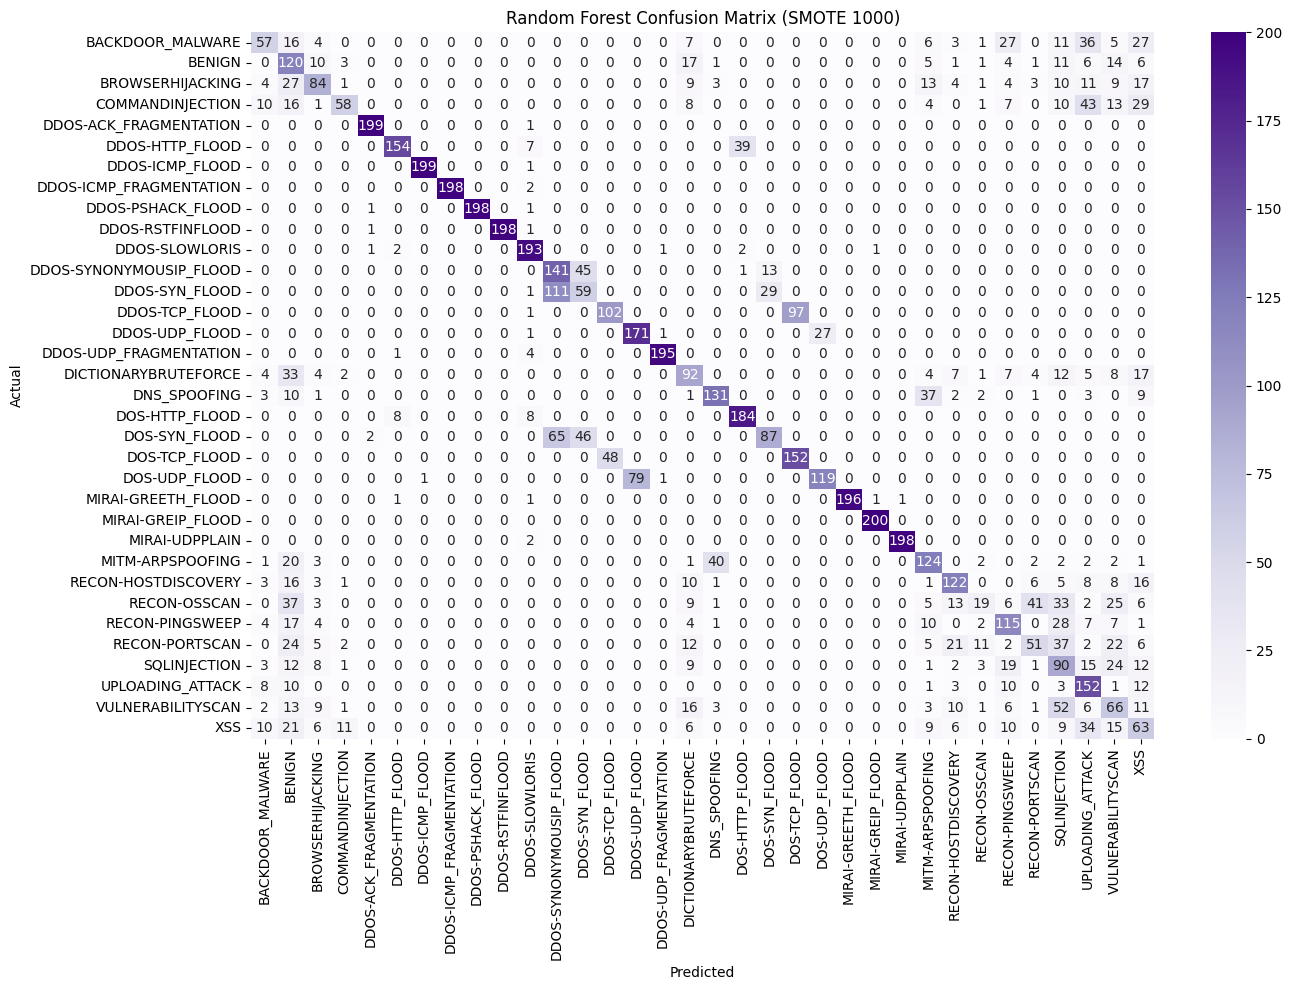

Random Forest SMOTE 2500
Accuracy:  0.687764705882353
Macro f1-score:  0.6817757460485908
Weighted f1-score:  0.6817757460485907
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.56      0.40      0.47       500
                 BENIGN       0.34      0.70      0.46       500
       BROWSERHIJACKING       0.67      0.48      0.56       500
       COMMANDINJECTION       0.79      0.36      0.50       500
 DDOS-ACK_FRAGMENTATION       0.99      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.91      0.80      0.85       500
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       500
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.88      0.98      0.93       500
DDOS-SYNONYMOUSIP_FLOOD       0.48      0.83      0.61       500
         DDOS-SYN_FLOOD  

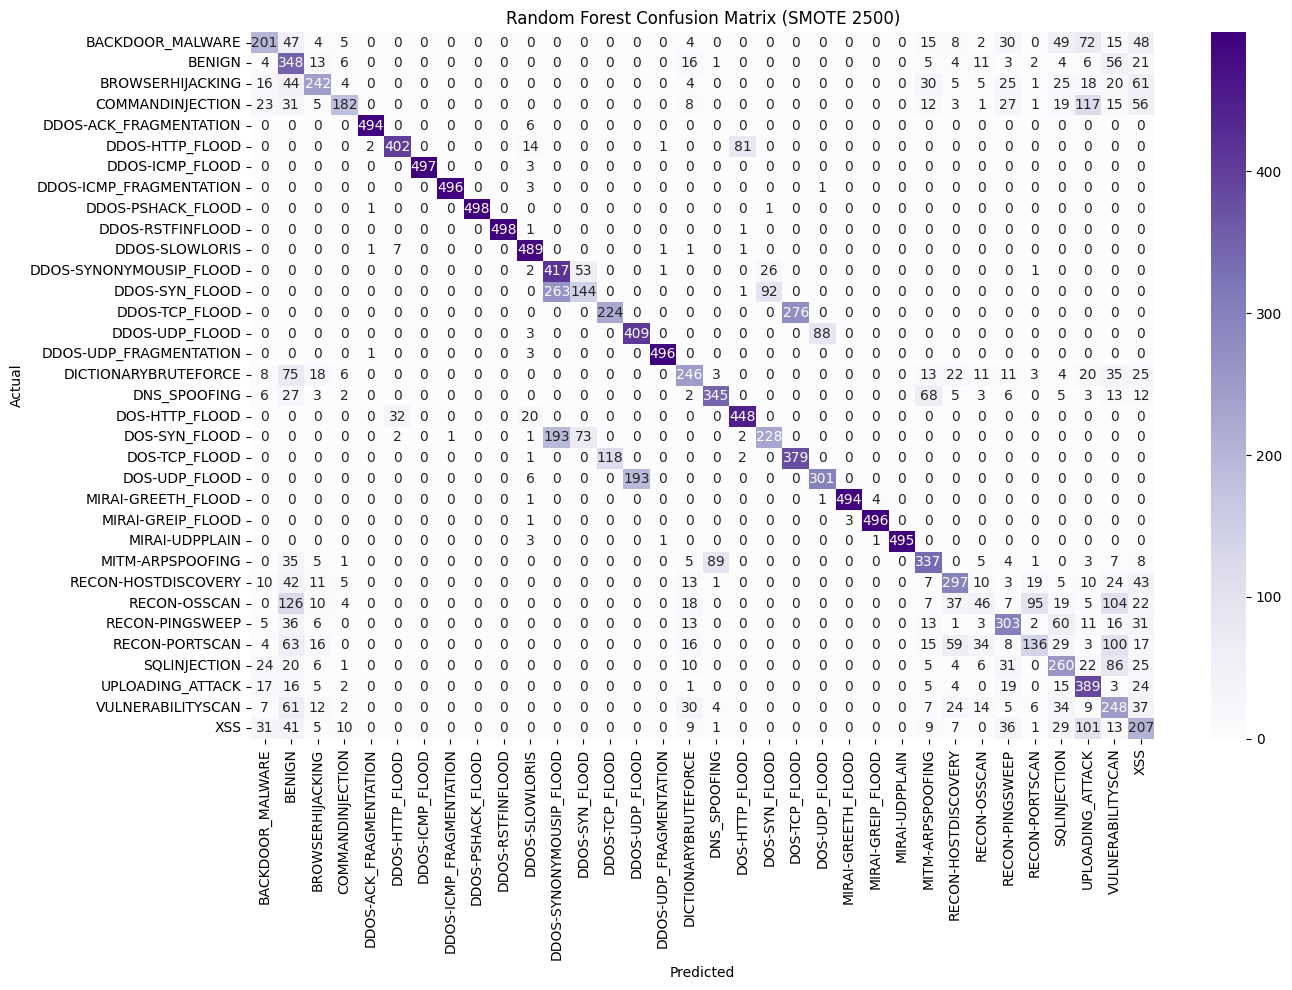

Random Forest SMOTE 5000
Accuracy:  0.6981176470588235
Macro f1-score:  0.692924695199591
Weighted f1-score:  0.692924695199591
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.65      0.45      0.53      1000
                 BENIGN       0.34      0.69      0.45      1000
       BROWSERHIJACKING       0.72      0.53      0.61      1000
       COMMANDINJECTION       0.87      0.40      0.55      1000
 DDOS-ACK_FRAGMENTATION       0.99      0.98      0.99      1000
        DDOS-HTTP_FLOOD       0.89      0.80      0.84      1000
        DDOS-ICMP_FLOOD       1.00      1.00      1.00      1000
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.98      1000
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00      1000
       DDOS-RSTFINFLOOD       1.00      1.00      1.00      1000
         DDOS-SLOWLORIS       0.90      0.98      0.93      1000
DDOS-SYNONYMOUSIP_FLOOD       0.46      0.82      0.59      1000
         DDOS-SYN_FLOOD   

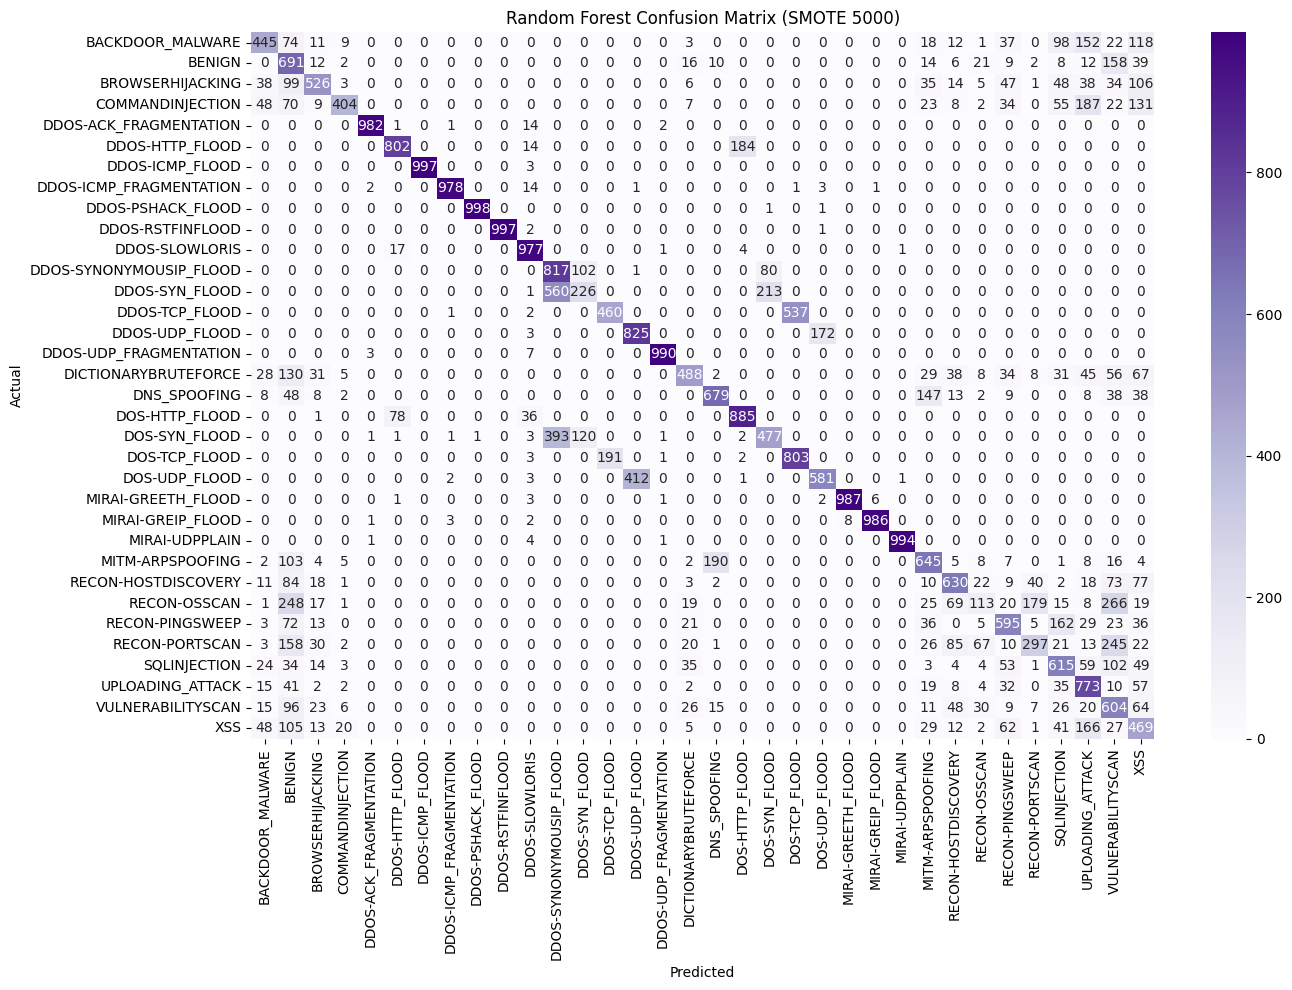

Random Forest Under 2500
Accuracy:  0.705243235665218
Macro f1-score:  0.6125424920963447
Weighted f1-score:  0.6914945408751506
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       1.00      0.06      0.12        97
                 BENIGN       0.37      0.69      0.48       500
       BROWSERHIJACKING       0.68      0.30      0.42       184
       COMMANDINJECTION       0.61      0.29      0.39       162
 DDOS-ACK_FRAGMENTATION       0.99      0.98      0.99       500
        DDOS-HTTP_FLOOD       0.89      0.75      0.82       500
        DDOS-ICMP_FLOOD       1.00      0.99      0.99       500
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.99       500
      DDOS-PSHACK_FLOOD       1.00      0.99      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.86      0.99      0.92       500
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.85      0.58       500
         DDOS-SYN_FLOOD  

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


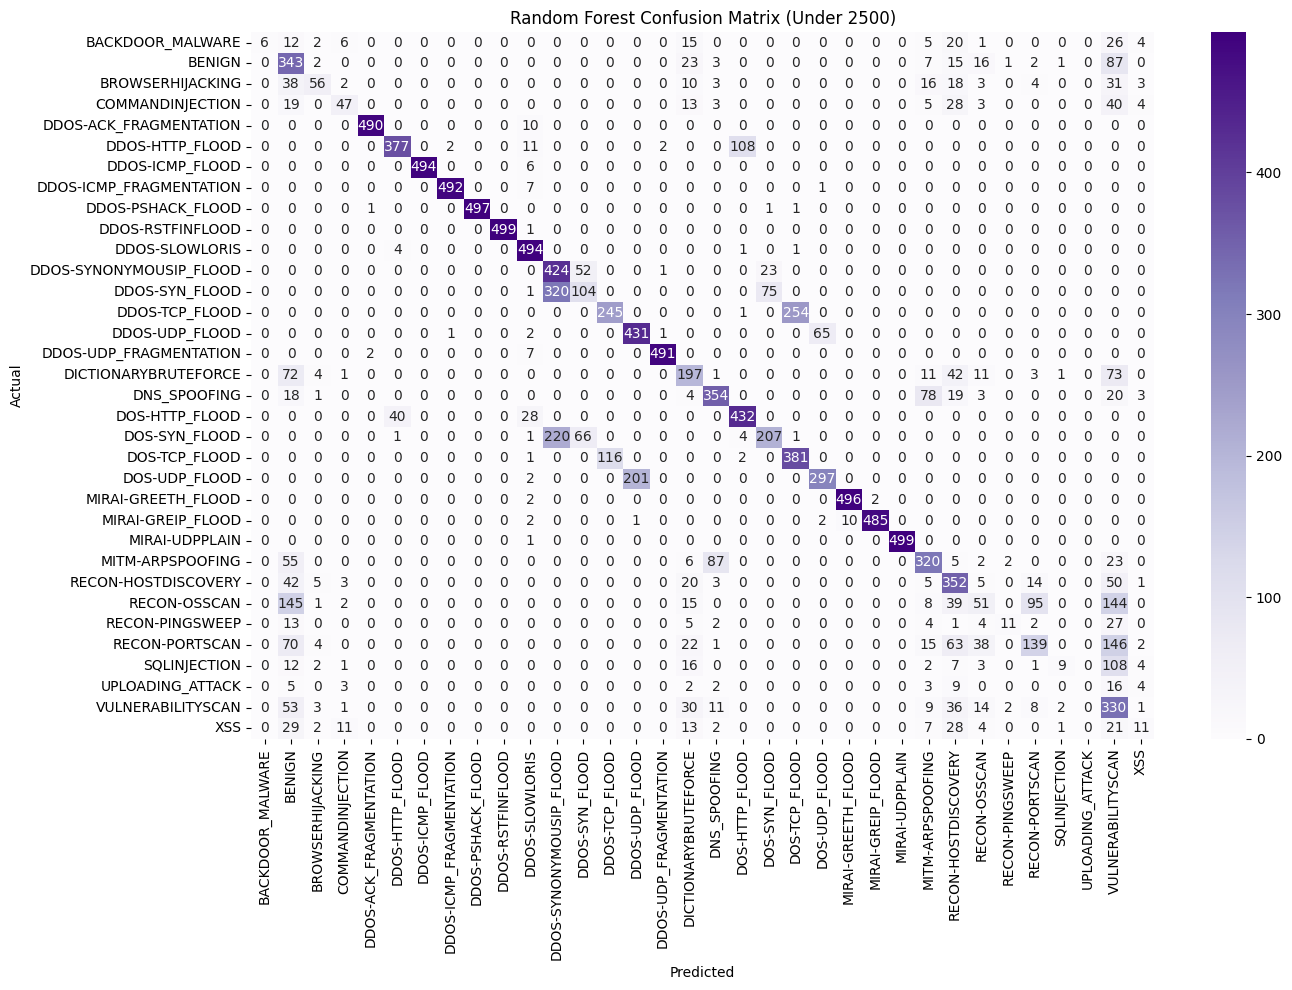

In [35]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest SMOTE 1000
print('Random Forest SMOTE 1000')

# Intializing the Random Forest classifier
random_forest_1000 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_1000.fit(x_train_1000, y_train_1000)
y_pred_random_forest_1000 = random_forest_1000.predict(x_test_1000)

# Creating the classification report for the Random Forest
print('Accuracy: ', accuracy_score(y_test_1000, y_pred_random_forest_1000))
print('Macro f1-score: ', f1_score(y_test_1000, y_pred_random_forest_1000, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_1000, y_pred_random_forest_1000, average = 'weighted'))
print(classification_report(y_test_1000, y_pred_random_forest_1000, target_names = attack_names_1000))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_1000 = confusion_matrix(y_test_1000, y_pred_random_forest_1000)
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_random_forest_1000, annot = True, fmt = 'd', cmap ='Purples',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title('Random Forest Confusion Matrix (SMOTE 1000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


# Random Forest SMOTE 2500
print('Random Forest SMOTE 2500')

# Intializing the Random Forest classifier
random_forest_2500 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_2500.fit(x_train_2500, y_train_2500)
y_pred_random_forest_2500 = random_forest_2500.predict(x_test_2500)

# Creating the classification report for the Random Forest
print('Accuracy: ', accuracy_score(y_test_2500, y_pred_random_forest_2500))
print('Macro f1-score: ', f1_score(y_test_2500, y_pred_random_forest_2500, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_2500, y_pred_random_forest_2500, average = 'weighted'))
print(classification_report(y_test_2500, y_pred_random_forest_2500, target_names = attack_names_2500))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_2500 = confusion_matrix(y_test_2500, y_pred_random_forest_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_random_forest_2500, annot = True, fmt = 'd', cmap = 'Purples',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title('Random Forest Confusion Matrix (SMOTE 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# Random Forest SMOTE 5000
print('Random Forest SMOTE 5000')

# Intializing the Random Forest classifier
random_forest_5000 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_5000.fit(x_train_5000, y_train_5000)
y_pred_random_forest_5000 = random_forest_5000.predict(x_test_5000)

# Creating the classification report for the Random Forest
print('Accuracy: ', accuracy_score(y_test_5000, y_pred_random_forest_5000))
print('Macro f1-score: ', f1_score(y_test_5000, y_pred_random_forest_5000, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_5000, y_pred_random_forest_5000, average = 'weighted'))
print(classification_report(y_test_5000, y_pred_random_forest_5000, target_names = attack_names_5000))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_5000 = confusion_matrix(y_test_5000, y_pred_random_forest_5000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_random_forest_5000, annot = True, fmt = 'd', cmap = 'Purples',
            xticklabels = attack_names_5000, yticklabels = attack_names_5000)
plt.title('Random Forest Confusion Matrix (SMOTE 5000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# Random Forest Under 2500
print('Random Forest Under 2500')

# Intializing the Random Forest classifier
random_forest_under_2500 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_under_2500.fit(x_train_under_2500, y_train_under_2500)
y_pred_random_forest_under_2500 = random_forest_under_2500.predict(x_test_under_2500)

# Creating the classification report for the Random Forest
print('Accuracy: ', accuracy_score(y_test_under_2500, y_pred_random_forest_under_2500))
print('Macro f1-score: ', f1_score(y_test_under_2500, y_pred_random_forest_under_2500, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_under_2500, y_pred_random_forest_under_2500, average = 'weighted'))
print(classification_report(y_test_under_2500, y_pred_random_forest_under_2500, target_names = attack_names_under_2500))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_under_2500 = confusion_matrix(y_test_under_2500, y_pred_random_forest_under_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_random_forest_under_2500, annot = True, fmt = 'd', cmap = 'Purples',
            xticklabels = attack_names_under_2500, yticklabels = attack_names_under_2500)
plt.title('Random Forest Confusion Matrix (Under 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

XGBoost SMOTE 1000
Accuracy:  0.6730882352941177
Macro f1-score:  0.6730429249674189
Weighted f1-score:  0.6730429249674191
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.55      0.51      0.53       200
                 BENIGN       0.44      0.53      0.48       200
       BROWSERHIJACKING       0.47      0.47      0.47       200
       COMMANDINJECTION       0.41      0.41      0.41       200
 DDOS-ACK_FRAGMENTATION       0.97      0.99      0.98       200
        DDOS-HTTP_FLOOD       0.91      0.81      0.86       200
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       200
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.98      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.90      0.97      0.93       200
DDOS-SYNONYMOUSIP_FLOOD       0.43      0.54      0.48       200
         DDOS-SYN_FLOOD       

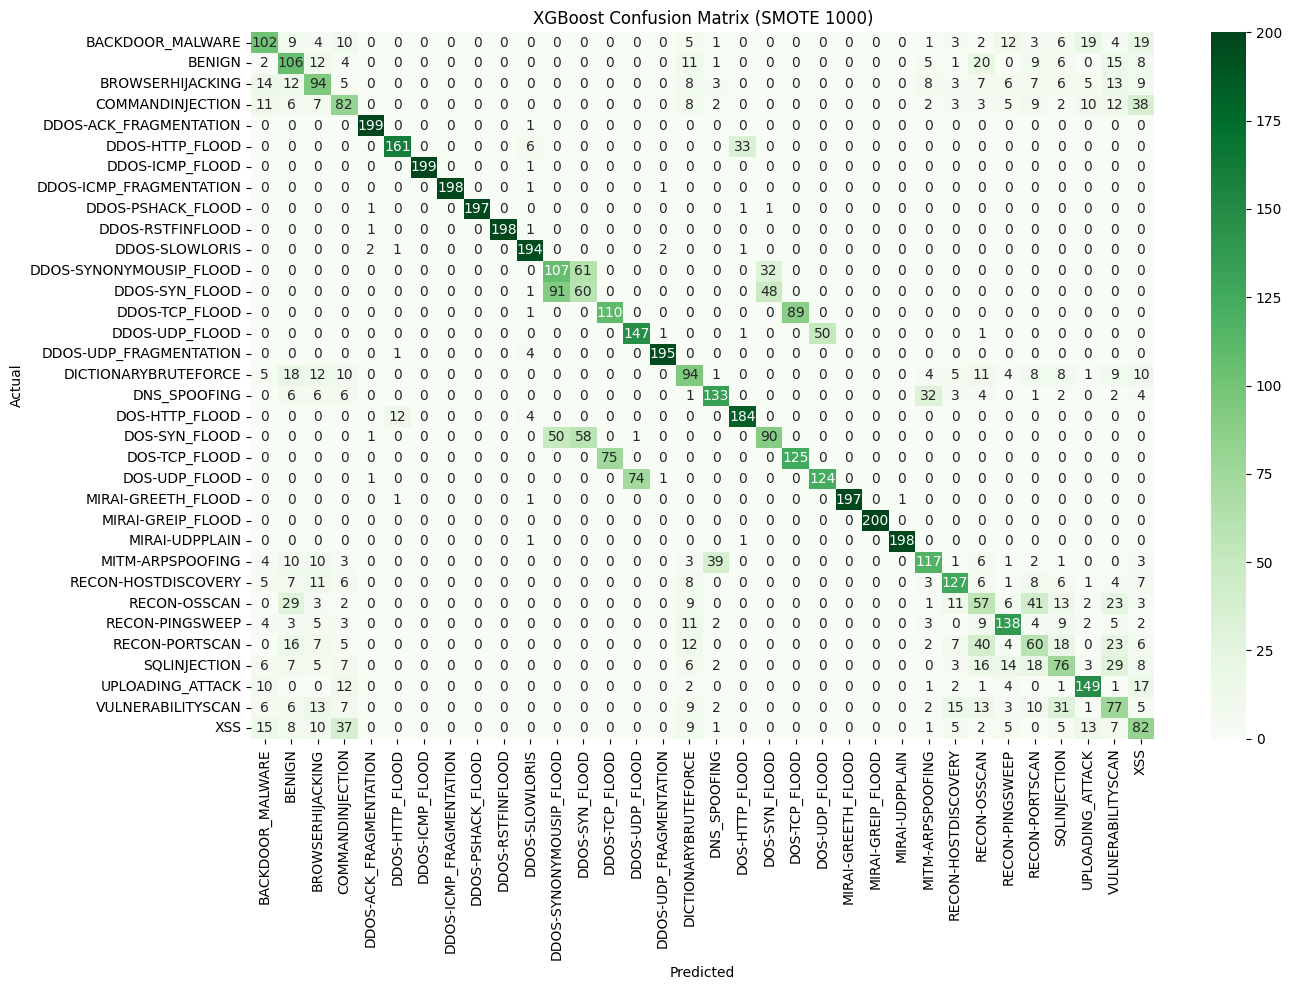

XGBoost SMOTE 2500
Accuracy:  0.7410588235294118
Macro f1-score:  0.7394922601172742
Weighted f1-score:  0.7394922601172741
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.77      0.79      0.78       500
                 BENIGN       0.46      0.61      0.52       500
       BROWSERHIJACKING       0.73      0.72      0.73       500
       COMMANDINJECTION       0.75      0.71      0.73       500
 DDOS-ACK_FRAGMENTATION       1.00      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.89      0.85      0.87       500
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       500
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.92      0.98      0.94       500
DDOS-SYNONYMOUSIP_FLOOD       0.46      0.63      0.53       500
         DDOS-SYN_FLOOD       

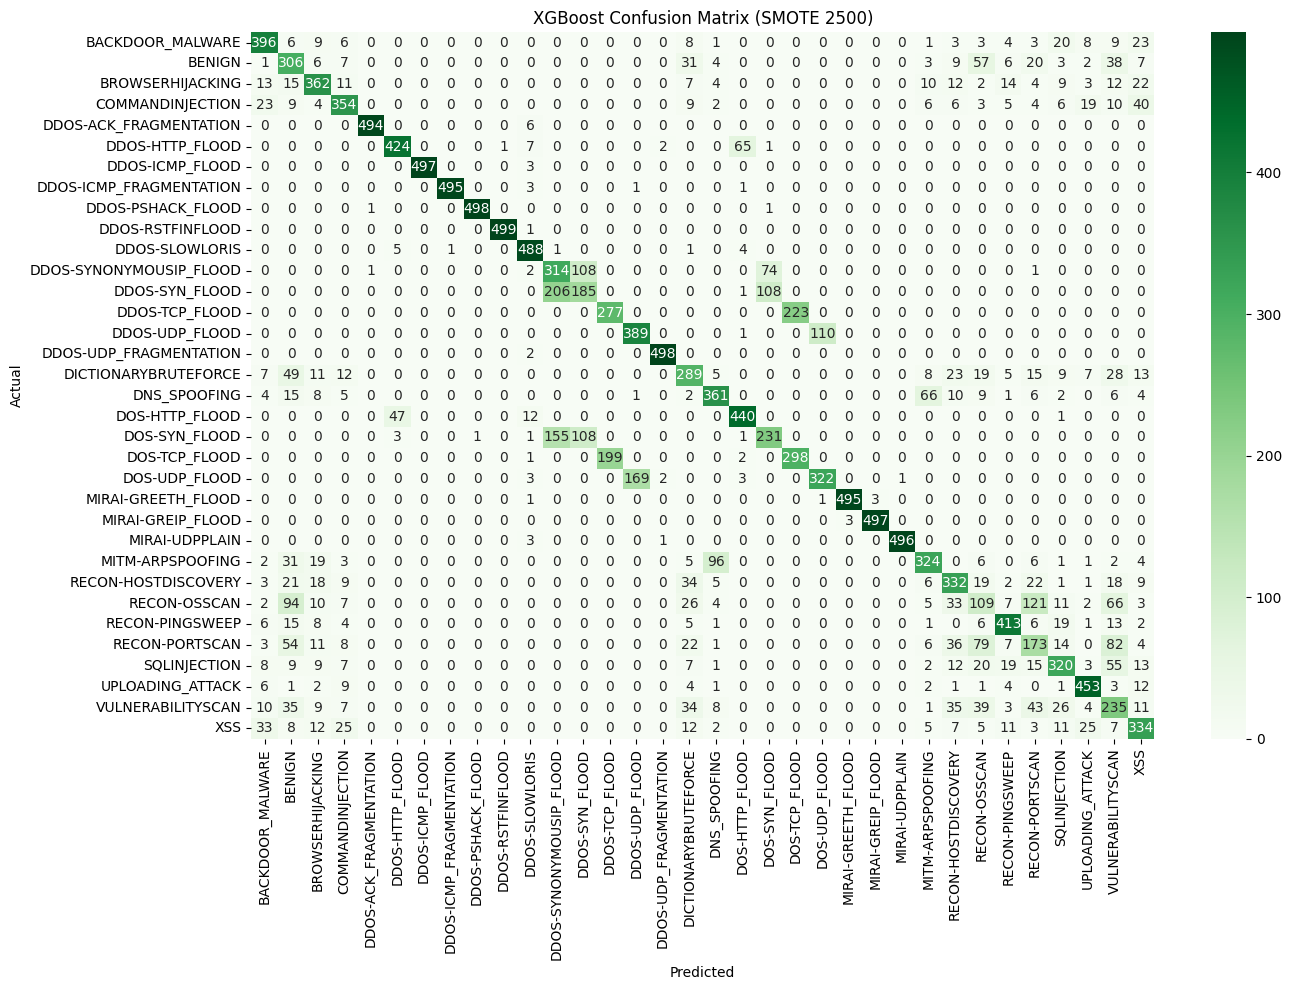

XGBoost SMOTE 5000
Accuracy:  0.5622941176470588
Macro f1-score:  0.5506629795050415
Weighted f1-score:  0.5506629795050415
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.54      0.25      0.34      1000
                 BENIGN       0.49      0.16      0.24      1000
       BROWSERHIJACKING       0.44      0.50      0.47      1000
       COMMANDINJECTION       0.50      0.43      0.46      1000
 DDOS-ACK_FRAGMENTATION       0.99      0.98      0.99      1000
        DDOS-HTTP_FLOOD       0.87      0.84      0.85      1000
        DDOS-ICMP_FLOOD       1.00      1.00      1.00      1000
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.99      1000
      DDOS-PSHACK_FLOOD       0.99      0.99      0.99      1000
       DDOS-RSTFINFLOOD       1.00      1.00      1.00      1000
         DDOS-SLOWLORIS       0.95      0.95      0.95      1000
DDOS-SYNONYMOUSIP_FLOOD       0.46      0.48      0.47      1000
         DDOS-SYN_FLOOD       

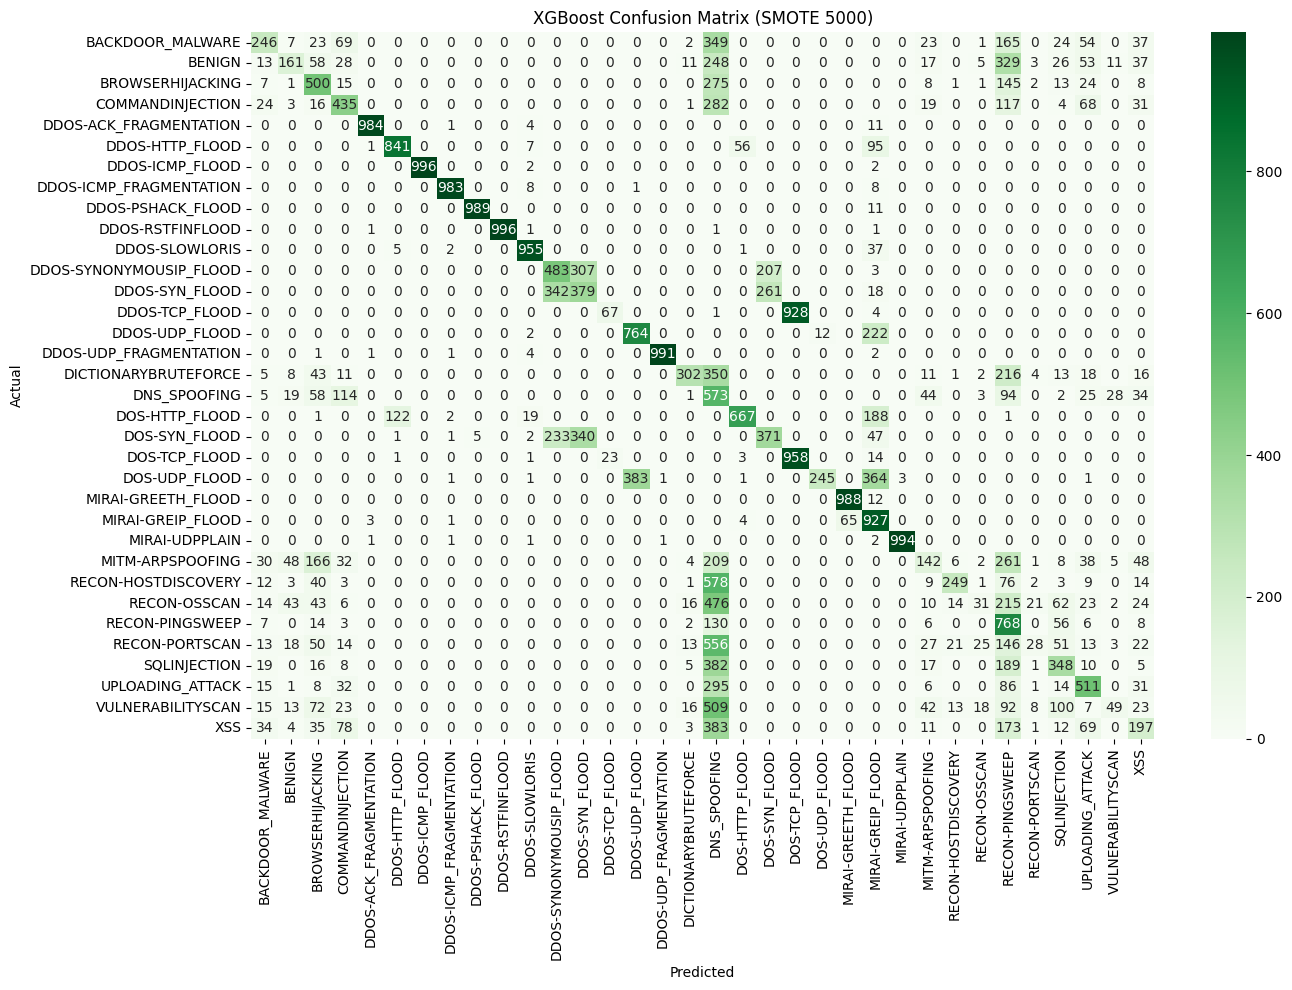

XGBoost Under 2500
Accuracy:  0.7063647834010935
Macro f1-score:  0.6271408045202365
Weighted f1-score:  0.701988808107685
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.30      0.18      0.22        97
                 BENIGN       0.44      0.61      0.51       500
       BROWSERHIJACKING       0.59      0.40      0.48       184
       COMMANDINJECTION       0.41      0.34      0.37       162
 DDOS-ACK_FRAGMENTATION       0.98      0.98      0.98       500
        DDOS-HTTP_FLOOD       0.87      0.80      0.83       500
        DDOS-ICMP_FLOOD       1.00      0.99      0.99       500
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.90      0.97      0.93       500
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.62      0.52       500
         DDOS-SYN_FLOOD       0

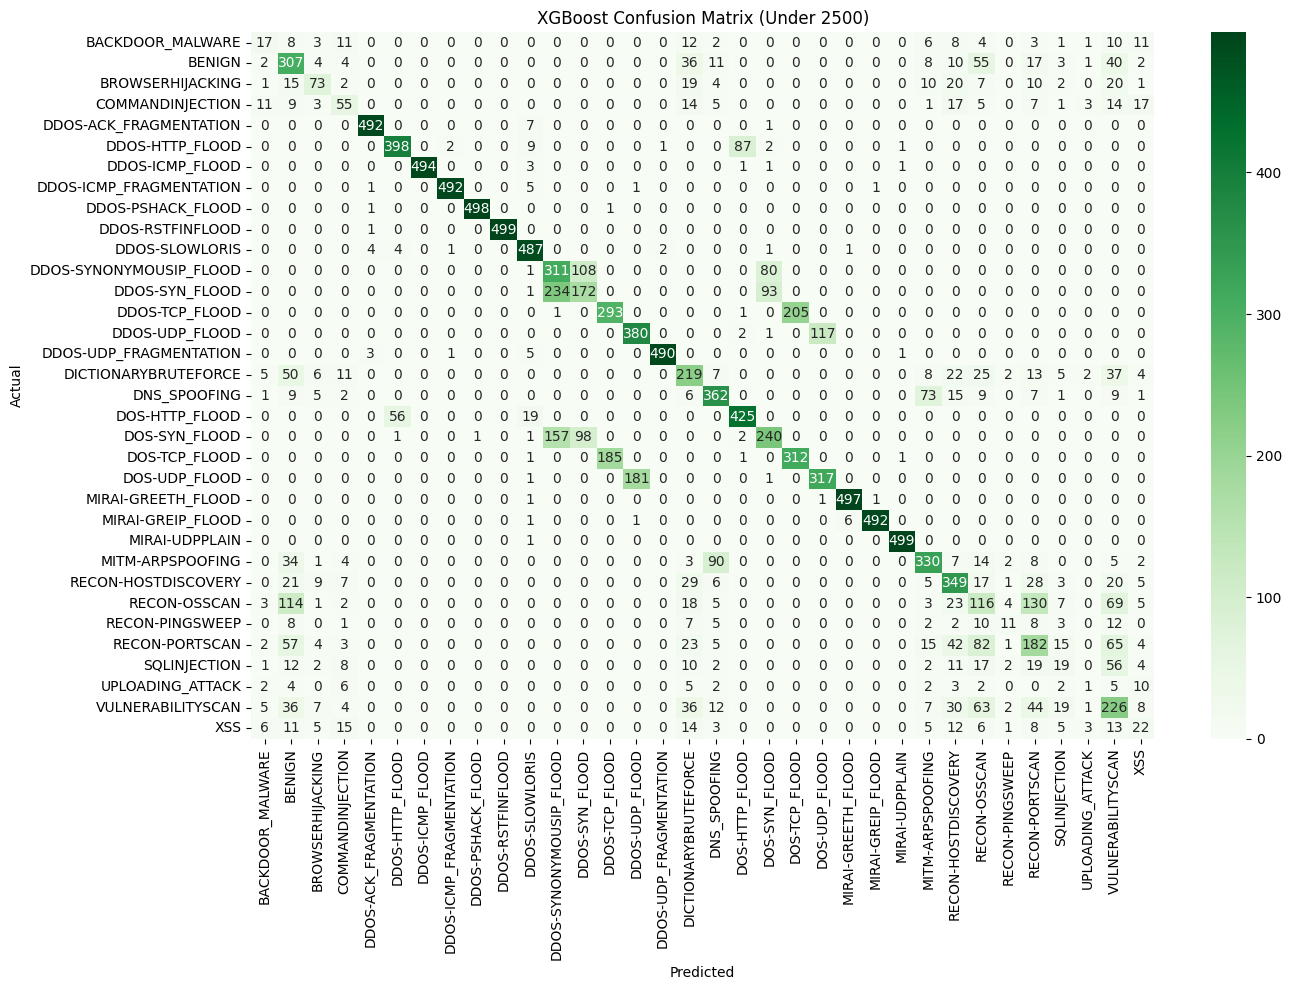

In [36]:
# Importing the necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost SMOTE 1000
print('XGBoost SMOTE 1000')

# Initializing the XGBoost classifier
xgboost_1000 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_1000.fit(x_train_1000, y_train_1000)
y_pred_xgboost_1000 = xgboost_1000.predict(x_test_1000)

# Creating the classification report for the XGBoost model
print('Accuracy: ', accuracy_score(y_test_1000, y_pred_xgboost_1000))
print('Macro f1-score: ', f1_score(y_test_1000, y_pred_xgboost_1000, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_1000, y_pred_xgboost_1000, average = 'weighted'))
print(classification_report(y_test_1000, y_pred_xgboost_1000, target_names = attack_names_1000))

# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_1000 = confusion_matrix(y_test_1000, y_pred_xgboost_1000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_1000, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title('XGBoost Confusion Matrix (SMOTE 1000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


# XGBoost SMOTE 2500
print('XGBoost SMOTE 2500')

# Initializing the XGBoost classifier
xgboost_2500 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_2500.fit(x_train_2500, y_train_2500)
y_pred_xgboost_2500 = xgboost_2500.predict(x_test_2500)


# Creating the classification report for the XGBoost model
print('Accuracy: ', accuracy_score(y_test_2500, y_pred_xgboost_2500))
print('Macro f1-score: ', f1_score(y_test_2500, y_pred_xgboost_2500, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_2500, y_pred_xgboost_2500, average = 'weighted'))
print(classification_report(y_test_2500, y_pred_xgboost_2500, target_names = attack_names_2500))


# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_2500 = confusion_matrix(y_test_2500, y_pred_xgboost_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_2500, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title('XGBoost Confusion Matrix (SMOTE 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# XGBoost SMOTE 5000
print('XGBoost SMOTE 5000')

# Initializing the XGBoost classifier
xgboost_5000 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_5000.fit(x_train_5000, y_train_5000)
y_pred_xgboost_5000 = xgboost_2500.predict(x_test_5000)


# Creating the classification report for the XGBoost model
print('Accuracy: ', accuracy_score(y_test_5000, y_pred_xgboost_5000))
print('Macro f1-score: ', f1_score(y_test_5000, y_pred_xgboost_5000, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_5000, y_pred_xgboost_5000, average = 'weighted'))
print(classification_report(y_test_5000, y_pred_xgboost_5000, target_names = attack_names_5000))


# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_5000 = confusion_matrix(y_test_5000, y_pred_xgboost_5000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_5000, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_5000, yticklabels = attack_names_5000)
plt.title('XGBoost Confusion Matrix (SMOTE 5000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# XGBoost Under 2500
print('XGBoost Under 2500')

# Initializing the XGBoost classifier
xgboost_under_2500 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_under_2500.fit(x_train_under_2500, y_train_under_2500)
y_pred_xgboost_under_2500 = xgboost_under_2500.predict(x_test_under_2500)


# Creating the classification report for the XGBoost model
print('Accuracy: ', accuracy_score(y_test_under_2500, y_pred_xgboost_under_2500))
print('Macro f1-score: ', f1_score(y_test_under_2500, y_pred_xgboost_under_2500, average = 'macro'))
print('Weighted f1-score: ', f1_score(y_test_under_2500, y_pred_xgboost_under_2500, average = 'weighted'))
print(classification_report(y_test_under_2500, y_pred_xgboost_under_2500, target_names = attack_names_under_2500))


# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_under_2500 = confusion_matrix(y_test_under_2500, y_pred_xgboost_under_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_under_2500, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_under_2500, yticklabels = attack_names_under_2500)
plt.title('XGBoost Confusion Matrix (Under 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

### Decision Tree
#### SMOTE 1000
Accuracy: 0.6151  
Macro f1-score: 0.6155  
Weighted f1-score: 0.6155  

#### SMOTE 2500
Accuracy: 0.6633  
Macro f1-score: 0.6625  
Weighted f1-score: 0.6625  

#### SMOTE 5000
Accuracy: 0.7004  
Macro f1-score: 0.7004  
Weighted f1-score: 0.7004  

#### Under 2500
Accuracy: 0.6550  
Macro f1-score: 0.5770  
Weighted f1-score: 0.6547  

### Random Forest
#### SMOTE 1000
Accuracy: 0.6599  
Macro f1-score: 0.6542  
Weighted f1-score: 0.6542  

#### SMOTE 2500
Accuracy: 0.6878  
Macro f1-score: 0.6818  
Weighted f1-score: 0.6818  

#### SMOTE 5000
Accuracy: 0.6981  
Macro f1-score: 0.6929   
Weighted f1-score: 0.6929  

#### Under 2500
Accuracy: 0.7052  
Macro f1-score: 0.6125  
Weighted f1-score: 0.6915  


### XGBoost
#### SMOTE 1000
Accuracy: 0.6731  
Macro f1-score: 0.6730  
Weighted f1-score: 0.6730  

#### SMOTE 2500
Accuracy: 0.7411  
Macro f1-score: 0.7395  
Weighted f1-score: 0.7395  

#### SMOTE 5000
Accuracy: 0.5623  
Macro f1-score: 0.5507  
Weighted f1-score: 0.5507  

#### Under 2500
Accuracy: 0.7064  
Macro f1-score: 0.6271  
Weighted f1-score: 0.7020  